# Preliminaries
I worked on this problem set completely individually and the link to my github repo is :
https://github.com/zhu340/ECE209_Pset2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from IPython.display import display

# 1. Setup

### 1(a) :
For any state in the form of (x,y,h), assume L=W=6

In [2]:
L = 6
W= 6

S = [(i,j,h)  for i in range(L) for j in range(W) for h in range(12)] 
print(S)
print(len(S))

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 0, 8), (0, 0, 9), (0, 0, 10), (0, 0, 11), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (0, 1, 10), (0, 1, 11), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (0, 2, 8), (0, 2, 9), (0, 2, 10), (0, 2, 11), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 3, 7), (0, 3, 8), (0, 3, 9), (0, 3, 10), (0, 3, 11), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 4, 6), (0, 4, 7), (0, 4, 8), (0, 4, 9), (0, 4, 10), (0, 4, 11), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (0, 5, 6), (0, 5, 7), (0, 5, 8), (0, 5, 9), (0, 5, 10), (0, 5, 11), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 0, 8), (1, 0, 9), (1, 0, 10), (1, 0, 11), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1,

$N_S$ = 12WL

### 1(b):
For action space:
- n: no move; f:forward; b:backward
- l:counter-clockwise; r: clock-wise

In [3]:
Move = ['n','f','b']
Rotation = ['','l','r']
A = set([m+r for m in Move for r in Rotation]) - set(['nl','nr']) 
print(A)
print(len(A))

{'fl', 'b', 'n', 'bl', 'f', 'fr', 'br'}
7


$N_A$ = 7

### 1(c):

In [4]:
def h_correct(h) :return h%12

def get_NextState_template(s_cur, action, offset): #templates of what should be happening in the next state
    s_nxt = [0,0,0];
    
    start_x = s_cur[0];
    start_y = s_cur[1];
    start_h = s_cur[2];
    
    if action == 'n': return s_cur
    else: end_h_tmp = (start_h + offset)%12
            
    
    if end_h_tmp == 11 or end_h_tmp == 0 or end_h_tmp == 1:
        if action == 'f': s_nxt =      [start_x, start_y + 1, end_h_tmp               ]
        elif action == 'fl': s_nxt =   [start_x, start_y + 1, h_correct(end_h_tmp - 1)]
        elif action == 'fr': s_nxt =   [start_x, start_y + 1, h_correct(end_h_tmp + 1)]
        elif action == 'b': s_nxt =    [start_x, start_y - 1, end_h_tmp               ]
        elif action == 'bl': s_nxt =   [start_x, start_y - 1, h_correct(end_h_tmp - 1)]
        elif action == 'br': s_nxt =   [start_x, start_y - 1, h_correct(end_h_tmp + 1)]
        
        
    if end_h_tmp == 2 or end_h_tmp == 3 or end_h_tmp == 4:
        if action == 'f': s_nxt =      [start_x + 1, start_y, end_h_tmp               ]
        elif action == 'fl': s_nxt =   [start_x + 1, start_y, h_correct(end_h_tmp - 1)]
        elif action == 'fr': s_nxt =   [start_x + 1, start_y, h_correct(end_h_tmp + 1)]      
        elif action == 'b': s_nxt =    [start_x - 1, start_y, end_h_tmp               ]
        elif action == 'bl': s_nxt =   [start_x - 1, start_y, h_correct(end_h_tmp - 1)]
        elif action == 'br': s_nxt =   [start_x - 1, start_y, h_correct(end_h_tmp + 1)]    
        
        
    if end_h_tmp == 5 or end_h_tmp == 6 or end_h_tmp == 7:
        if action == 'b': s_nxt =      [start_x, start_y + 1, end_h_tmp               ]
        elif action == 'bl': s_nxt =   [start_x, start_y + 1, h_correct(end_h_tmp - 1)]
        elif action == 'br': s_nxt =   [start_x, start_y + 1, h_correct(end_h_tmp + 1)]
        elif action == 'f': s_nxt =    [start_x, start_y - 1, end_h_tmp               ]
        elif action == 'fl': s_nxt =   [start_x, start_y - 1, h_correct(end_h_tmp - 1)]
        elif action == 'fr': s_nxt =   [start_x, start_y - 1, h_correct(end_h_tmp + 1)]
        
        
    if end_h_tmp == 8 or end_h_tmp == 9 or end_h_tmp == 10:
        if action == 'b': s_nxt =      [start_x + 1, start_y, end_h_tmp               ]
        elif action == 'bl': s_nxt =   [start_x + 1, start_y, h_correct(end_h_tmp - 1)]
        elif action == 'br': s_nxt =   [start_x + 1, start_y, h_correct(end_h_tmp + 1)]      
        elif action == 'f': s_nxt =    [start_x - 1, start_y, end_h_tmp               ]
        elif action == 'fl': s_nxt =   [start_x - 1, start_y, h_correct(end_h_tmp - 1)]
        elif action == 'fr': s_nxt =   [start_x - 1, start_y, h_correct(end_h_tmp + 1)] 
        
        
    if s_nxt[0] < 0 or s_nxt[0] > 5 or s_nxt[1] <0 or s_nxt[1] > 5: 
        s_nxt[0] = s_cur[0]
        s_nxt[1] = s_cur[1]
    
    return tuple(s_nxt)

In [5]:
def get_TransionProb(start,end,action,pe):
    start_x = start[0];
    start_y = start[1];
    start_h = start[2];
    end_x = end[0];
    end_y = end[1];
    end_h = end[2];
    
    delta_h = abs(start_h - end_h);

    #Remove impossible cases
    if (abs(end_x - start_x) + abs(end_y - start_y)) > 1: return 0
    elif end_x < 0 or end_x > 5 or end_y <0 or end_y > 5: return 0
    elif delta_h != 0 and delta_h != 1 and delta_h != 11 and delta_h != 2 and delta_h != 10 : return 0
    
    if action == 'n': 
        if start == end: return 1
        else: return 0
    
    #Build templates to chech if error happens
    template = get_NextState_template(start, action, 0) #No error
    templatel = get_NextState_template(start, action, -1) #Left error
    templater = get_NextState_template(start, action, 1) #Right error
    
    if end == template: return 1-2*pe
    
    elif end == templatel:return pe
    elif end == templater:return pe
    else: return 0

### 1(d):

In [6]:
def NextState(s_cur, action, pe, S):
    possible_states = [];
    probs = [];
    
    for s in S:
        prob = get_TransionProb(s_cur,s,action,pe);
        if  prob != 0:
            possible_states.append(s)
            probs.append(prob)
            
    god_choice = np.random.choice(np.arange(len(probs)),p=probs)
    
    return possible_states[god_choice]


### 2:

In [7]:
def reward(state):
    R = np.zeros((6,6))
    R[0:6,0]  = -100;
    R[0:6,5]  = -100;
    R[0,0:6]  = -100;
    R[5,0:6] =  -100;
    R[4,3] = 1
    R[2:5,2] = -10
    R[2:5,4] = -10

    return R[state[1],state[0]]

### 3(a):

In [8]:
pi0_map = dict((s,'') for s in S)


for s in S:
    s_x = s[0];
    s_y = s[1];
    s_h = s[2];
    
    if s_h in [11,0,1]:
        if s_x < 3: a_h = 'r'
        elif s_x > 3: a_h = 'l'
        else: a_h = ''
        
        if s_y <= 4: a_mov = 'f'
        else: a_mov = 'b'
            
        if s_x == 3 and s_y == 4: pi0_map[s] = 'n'
        else: pi0_map[s] = a_mov + a_h

            
    elif s_h in [2,3,4]:
        if s_y < 4: a_h = 'l'
        elif s_y > 4: a_h = 'r'
        else: a_h = ''
        
        if s_x <= 3: a_mov = 'f'
        elif s_x > 3: a_mov = 'b'
            
        if s_x == 3 and s_y == 4: pi0_map[s] = 'n'
        else: pi0_map[s] = a_mov + a_h
            
            
    elif s_h in [5,6,7]:
        if s_x < 3: a_h = 'l'
        elif s_x > 3: a_h = 'r'
        else: a_h = ''
        
        if s_y < 4: a_mov = 'b'
        elif s_y >= 4: a_mov = 'f'
            
        if s_x == 3 and s_y == 4: pi0_map[s] = 'n'
        else: pi0_map[s] = a_mov + a_h
            
            
    elif s_h in [8,9,10]:
        if s_y < 4: a_h = 'r'
        elif s_y > 4: a_h = 'l'
        else: a_h = ''
        
        if s_x < 3: a_mov = 'b'
        elif s_x >= 3: a_mov = 'f'
            
        if s_x == 3 and s_y == 4: pi0_map[s] = 'n'
        else: pi0_map[s] = a_mov + a_h
            
pi0_map

{(0, 0, 0): 'fr',
 (0, 0, 1): 'fr',
 (0, 0, 2): 'fl',
 (0, 0, 3): 'fl',
 (0, 0, 4): 'fl',
 (0, 0, 5): 'bl',
 (0, 0, 6): 'bl',
 (0, 0, 7): 'bl',
 (0, 0, 8): 'br',
 (0, 0, 9): 'br',
 (0, 0, 10): 'br',
 (0, 0, 11): 'fr',
 (0, 1, 0): 'fr',
 (0, 1, 1): 'fr',
 (0, 1, 2): 'fl',
 (0, 1, 3): 'fl',
 (0, 1, 4): 'fl',
 (0, 1, 5): 'bl',
 (0, 1, 6): 'bl',
 (0, 1, 7): 'bl',
 (0, 1, 8): 'br',
 (0, 1, 9): 'br',
 (0, 1, 10): 'br',
 (0, 1, 11): 'fr',
 (0, 2, 0): 'fr',
 (0, 2, 1): 'fr',
 (0, 2, 2): 'fl',
 (0, 2, 3): 'fl',
 (0, 2, 4): 'fl',
 (0, 2, 5): 'bl',
 (0, 2, 6): 'bl',
 (0, 2, 7): 'bl',
 (0, 2, 8): 'br',
 (0, 2, 9): 'br',
 (0, 2, 10): 'br',
 (0, 2, 11): 'fr',
 (0, 3, 0): 'fr',
 (0, 3, 1): 'fr',
 (0, 3, 2): 'fl',
 (0, 3, 3): 'fl',
 (0, 3, 4): 'fl',
 (0, 3, 5): 'bl',
 (0, 3, 6): 'bl',
 (0, 3, 7): 'bl',
 (0, 3, 8): 'br',
 (0, 3, 9): 'br',
 (0, 3, 10): 'br',
 (0, 3, 11): 'fr',
 (0, 4, 0): 'fr',
 (0, 4, 1): 'fr',
 (0, 4, 2): 'f',
 (0, 4, 3): 'f',
 (0, 4, 4): 'f',
 (0, 4, 5): 'fl',
 (0, 4, 6): 'fl',
 (0, 

### 3(b):

In [9]:
def get_traj(pi, s0, pe , S):

    trajs = [];
        
    s = s0
    trajs.append(s0)
        
    
    while s[0] != 3 or s[1] != 4:
        action = pi[s]
        s_nxt = NextState(s, action, pe, S)
        s = s_nxt
        trajs.append(s_nxt)
    
    #Make plots
    PI = np.pi/180
    
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1)
    plt.xlim((0,6))
    plt.ylim((0,6))
    plt.grid(True)
    
    for i in range(1,len(trajs)):
        s_x = trajs[i-1][0];
        s_y = trajs[i-1][1];
        snxt_x = trajs[i][0];
        snxt_y = trajs[i][1];        
        snxt_h = trajs[i][2];

        plt.plot(snxt_x+0.5,snxt_y+0.5,'ko',markersize = 6)
        plt.plot([s_x+0.5,snxt_x+0.5],[s_y+0.5,snxt_y+0.5],'r--')
        ax.arrow(snxt_x + 0.5, snxt_y + 0.5, 0.4 * np.sin(30*snxt_h*PI), 0.4*np.cos(30*snxt_h*PI),head_width = 0.1, head_length = 0.2,fc='k',ec='k')
    
    plt.show()       
    return trajs

### 3(c): 

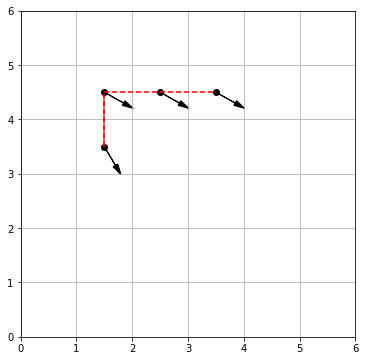

In [10]:
trajs = get_traj(pi0_map, (1,4,6), 0, S)

### 3(d):

In [11]:
import copy

def get_possible_set(s): #lower sparsity and reduce computation
    
    x = s[0]
    y = s[1]
    h = s[2]
    
    X = [x]
    Y = [y]
    H = [h,(h+1)%12, (h-1)%12, (h+2)%12, (h-2)%12]
    
    if x == 5: X = [x,x-1]
    elif x == 0: X = [x,x+1]
    else:X = [x-1,x,x+1]
    
    if y == 5: Y = [y,y-1]
    elif y == 0: Y = [y,y+1]
    else: Y = [y-1,y,y+1]   
    
    return [(i,j,k) for i in X for j in Y for k in H]


def policy_eval(pi, pe, gamma, S):

    V_map = dict((s,0) for s in S)
    

    delta = 100
    
    while delta > 1e-4:
        delta = 0
        
        V_temp = dict((s,0) for s in S)
        
        for s in S:
            r = reward(s)
            s_poss = get_possible_set(s)
            
            for s2 in s_poss:
                p = get_TransionProb(s,s2,pi[s],pe)
                V_temp[s] += p * (r + gamma * V_map[s2])

            delta = max(delta, abs(V_map[s] - V_temp[s]))
        
        V_map = copy.copy(V_temp)
        
    return(V_map)


### 3(e):

In [12]:
res = policy_eval(pi0_map, 0, 0.9, S)
res

{(0, 0, 0): -277.4371874149783,
 (0, 0, 1): -197.6837774149783,
 (0, 0, 2): -191.7788774149783,
 (0, 0, 3): -266.21787741497826,
 (0, 0, 4): -339.1178774149783,
 (0, 0, 5): -185.2178774149783,
 (0, 0, 6): -272.7788774149783,
 (0, 0, 7): -345.02277741497824,
 (0, 0, 8): -339.1178774149783,
 (0, 0, 9): -278.6837774149783,
 (0, 0, 10): -196.4371874149783,
 (0, 0, 11): -344.4322874149783,
 (0, 1, 0): -271.5913364149783,
 (0, 1, 1): -197.1523364149783,
 (0, 1, 2): -108.53743641497829,
 (0, 1, 3): -101.97643641497828,
 (0, 1, 4): -94.68643641497829,
 (0, 1, 5): -191.97643641497828,
 (0, 1, 6): -272.24743641497827,
 (0, 1, 7): -344.4913364149784,
 (0, 1, 8): -94.68643641497829,
 (0, 1, 9): -114.44233641497829,
 (0, 1, 10): -100.59133641497829,
 (0, 1, 11): -344.4913364149784,
 (0, 2, 0): -271.6569464149783,
 (0, 2, 1): -190.65694641497828,
 (0, 2, 2): -107.94694641497829,
 (0, 2, 3): -109.48594641497829,
 (0, 2, 4): -102.19594641497828,
 (0, 2, 5): -191.3859464149783,
 (0, 2, 6): -271.6569464

In [13]:
res[(1,4,6)]

-0.7298464149782855

### 3(f):

In [14]:
def policy_lookahead (V,pe,A):
    pi = dict((s,0) for s in S)
    
    for s in S:
        s_poss = get_possible_set(s)
        bestv = -1000000
        
        for a in A:
            v = 0
            
            for s2 in s_poss:
                v += get_TransionProb(s,s2,a,pe) * V[s2]
                
            if v > bestv:
                bestv = v
                best_a = a
        pi[s] = best_a
        
    return pi

### 3(g):

In [15]:
def policy_iteration(pi, pe, gamma, S,A):
    V1 = policy_eval(pi, pe, gamma, S)
    Pi1 = policy_lookahead (V1,pe,A)
    
    delta = 100
    
    while 1:
        V2 = policy_eval(Pi1, pe, gamma, S)
        Pi2 = policy_lookahead (V2,pe,A)
        
        if (V2 == V1):break
        
        V1 = V2
        Pi1 = Pi2
        
    return Pi2, V2

### 3(h) :

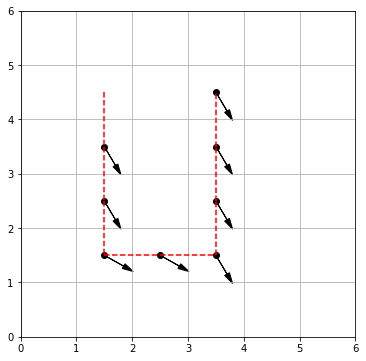

In [16]:
import time

time_start = time.clock()

pi_opt, v_opt = policy_iteration(pi0_map, 0, 0.9, S,A)

get_traj(pi_opt, (1,4,6), 0 , S)

time_elapsed = (time.clock() - time_start)

In [17]:
print(v_opt)

{(0, 0, 0): -266.6961743149783, (0, 0, 1): -185.2178774149783, (0, 0, 2): -185.2178774149783, (0, 0, 3): -266.21787741497826, (0, 0, 4): -185.2178774149783, (0, 0, 5): -185.2178774149783, (0, 0, 6): -266.6961743149783, (0, 0, 7): -185.2178774149783, (0, 0, 8): -185.2178774149783, (0, 0, 9): -266.21787741497826, (0, 0, 10): -185.2178774149783, (0, 0, 11): -185.2178774149783, (0, 1, 0): -266.6961743149783, (0, 1, 1): -185.6961743149783, (0, 1, 2): -94.68643641497829, (0, 1, 3): -94.68643641497829, (0, 1, 4): -94.68643641497829, (0, 1, 5): -185.6961743149783, (0, 1, 6): -266.6961743149783, (0, 1, 7): -185.6961743149783, (0, 1, 8): -94.68643641497829, (0, 1, 9): -94.68643641497829, (0, 1, 10): -94.68643641497829, (0, 1, 11): -185.6961743149783, (0, 2, 0): -267.1266415249783, (0, 2, 1): -185.2178774149783, (0, 2, 2): -95.21787741497829, (0, 2, 3): -100.0, (0, 2, 4): -95.21787741497829, (0, 2, 5): -185.2178774149783, (0, 2, 6): -267.1266415249783, (0, 2, 7): -185.2178774149783, (0, 2, 8): -9

### 3(i):

In [18]:
print('Time elapsed :%f' % time_elapsed)

Time elapsed :29.486695


### 4(a):

In [19]:
def value_iteration(pe,gamma,S,A):
    
    V_map = dict((s,0) for s in S)
    policy = dict((s,0) for s in S)

    delta = 100
    
    while delta > 1e-4:
        delta = 0
        
        V_temp = dict((s,0) for s in S)
        
        for s in S:
            r = reward(s)
            s_poss = get_possible_set(s)
            
            bestv = -10000
            for a in A:
                v = 0
                
                for s2 in s_poss:
                    p = get_TransionProb(s,s2,a,pe)
                    v += p * (r + gamma * V_map[s2])
            
                    if v > bestv:
                        bestv = v
                        besta = a
                        
            V_temp[s] = bestv
            policy[s] = besta
            
            delta = max(delta, abs(V_map[s] - V_temp[s]))
        
        V_map = copy.copy(V_temp)   
        
    return policy, V_map        

### 4(b):
What I got was almost identical to 3(h), as shown below:

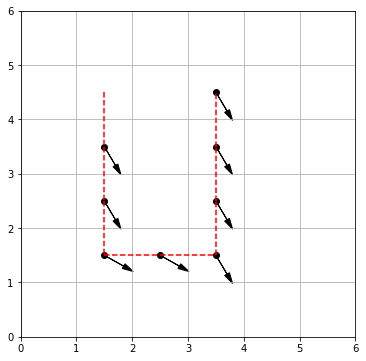

In [20]:
time_start = time.clock()

pi_opt, v_opt = value_iteration(0, 0.9, S,A)

get_traj(pi_opt, (1,4,6), 0 , S)

time_elapsed = (time.clock() - time_start)

In [21]:
print(v_opt)

{(0, 0, 0): 0.0, (0, 0, 1): 0.0, (0, 0, 2): 0.0, (0, 0, 3): 0.0, (0, 0, 4): 0.0, (0, 0, 5): 0.0, (0, 0, 6): 0.0, (0, 0, 7): 0.0, (0, 0, 8): 0.0, (0, 0, 9): 0.0, (0, 0, 10): 0.0, (0, 0, 11): 0.0, (0, 1, 0): 0.0, (0, 1, 1): 0.0, (0, 1, 2): 0.0, (0, 1, 3): 0.0, (0, 1, 4): 0.0, (0, 1, 5): 0.0, (0, 1, 6): 0.0, (0, 1, 7): 0.0, (0, 1, 8): 0.0, (0, 1, 9): 0.0, (0, 1, 10): 0.0, (0, 1, 11): 0.0, (0, 2, 0): 0.0, (0, 2, 1): 0.0, (0, 2, 2): 0.0, (0, 2, 3): 0.0, (0, 2, 4): 0.0, (0, 2, 5): 0.0, (0, 2, 6): 0.0, (0, 2, 7): 0.0, (0, 2, 8): 0.0, (0, 2, 9): 0.0, (0, 2, 10): 0.0, (0, 2, 11): 0.0, (0, 3, 0): 0.0, (0, 3, 1): 0.0, (0, 3, 2): 0.0, (0, 3, 3): 0.0, (0, 3, 4): 0.0, (0, 3, 5): 0.0, (0, 3, 6): 0.0, (0, 3, 7): 0.0, (0, 3, 8): 0.0, (0, 3, 9): 0.0, (0, 3, 10): 0.0, (0, 3, 11): 0.0, (0, 4, 0): 0.0, (0, 4, 1): 0.0, (0, 4, 2): 0.0, (0, 4, 3): 0.0, (0, 4, 4): 0.0, (0, 4, 5): 0.0, (0, 4, 6): 0.0, (0, 4, 7): 0.0, (0, 4, 8): 0.0, (0, 4, 9): 0.0, (0, 4, 10): 0.0, (0, 4, 11): 0.0, (0, 5, 0): 0.0, (0, 5, 1): 0.

### 4(c):

In [22]:
print('Time elapsed :%f' % time_elapsed)

Time elapsed :29.157124


### 5(a):

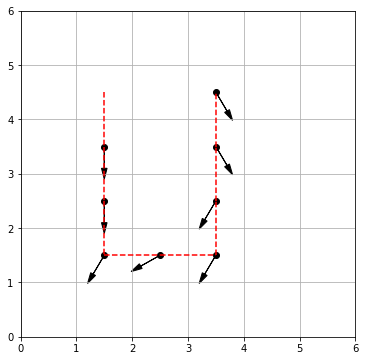

[(1, 4, 6),
 (1, 3, 6),
 (1, 2, 6),
 (1, 1, 7),
 (2, 1, 8),
 (3, 1, 7),
 (3, 2, 7),
 (3, 3, 5),
 (3, 4, 5)]

In [23]:
pi_opt, v_opt = value_iteration(0.25, 0.9, S,A)

get_traj(pi_opt, (1,4,6), 0.25 , S)

In [24]:
print(v_opt)

{(0, 0, 0): 0.0, (0, 0, 1): 0.0, (0, 0, 2): 0.0, (0, 0, 3): 0.0, (0, 0, 4): 0.0, (0, 0, 5): 0.0, (0, 0, 6): 0.0, (0, 0, 7): 0.0, (0, 0, 8): 0.0, (0, 0, 9): 0.0, (0, 0, 10): 0.0, (0, 0, 11): 0.0, (0, 1, 0): 0.0, (0, 1, 1): 0.0, (0, 1, 2): 0.0, (0, 1, 3): 0.0, (0, 1, 4): 0.0, (0, 1, 5): 0.0, (0, 1, 6): 0.0, (0, 1, 7): 0.0, (0, 1, 8): 0.0, (0, 1, 9): 0.0, (0, 1, 10): 0.0, (0, 1, 11): 0.0, (0, 2, 0): 0.0, (0, 2, 1): 0.0, (0, 2, 2): 0.0, (0, 2, 3): 0.0, (0, 2, 4): 0.0, (0, 2, 5): 0.0, (0, 2, 6): 0.0, (0, 2, 7): 0.0, (0, 2, 8): 0.0, (0, 2, 9): 0.0, (0, 2, 10): 0.0, (0, 2, 11): 0.0, (0, 3, 0): 0.0, (0, 3, 1): 0.0, (0, 3, 2): 0.0, (0, 3, 3): 0.0, (0, 3, 4): 0.0, (0, 3, 5): 0.0, (0, 3, 6): 0.0, (0, 3, 7): 0.0, (0, 3, 8): 0.0, (0, 3, 9): 0.0, (0, 3, 10): 0.0, (0, 3, 11): 0.0, (0, 4, 0): 0.0, (0, 4, 1): 0.0, (0, 4, 2): 0.0, (0, 4, 3): 0.0, (0, 4, 4): 0.0, (0, 4, 5): 0.0, (0, 4, 6): 0.0, (0, 4, 7): 0.0, (0, 4, 8): 0.0, (0, 4, 9): 0.0, (0, 4, 10): 0.0, (0, 4, 11): 0.0, (0, 5, 0): 0.0, (0, 5, 1): 0.

### 5(b):

In [25]:
def reward2(state):
    R = np.zeros((6,6))
    R[0:6,0]  = -100;
    R[0:6,5]  = -100;
    R[0,0:6]  = -100;
    R[5,0:6] =  -100;
    R[4,3] = 1
    R[2:5,2] = -10
    R[2:5,4] = -10

    if  state[0] == 3 and state[1] == 4 and (state[2] not in [5,6,7]): return 0
    else: return R[state[1],state[0]]

In [26]:
def value_iteration2(pe,gamma,S,A):
    
    V_map = dict((s,0) for s in S)
    policy = dict((s,0) for s in S)

    delta = 100
    
    while delta > 1e-4:
        delta = 0
        
        V_temp = dict((s,0) for s in S)
        
        for s in S:
            r = reward2(s)
            s_poss = get_possible_set(s)
            
            bestv = -10000
            for a in A:
                v = 0
                
                for s2 in s_poss:
                    p = get_TransionProb(s,s2,a,pe)
                    v += p * (r + gamma * V_map[s2])
            
                    if v > bestv:
                        bestv = v
                        besta = a
                        
            V_temp[s] = bestv
            policy[s] = besta
            
            delta = max(delta, abs(V_map[s] - V_temp[s]))
        
        V_map = copy.copy(V_temp)   
        
    return policy, V_map   

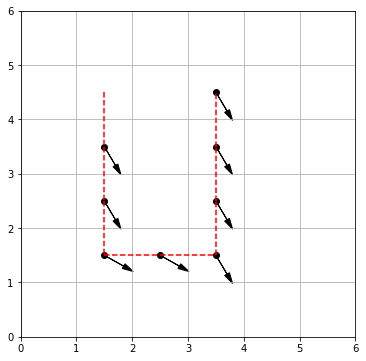

[(1, 4, 6),
 (1, 3, 5),
 (1, 2, 5),
 (1, 1, 4),
 (2, 1, 4),
 (3, 1, 5),
 (3, 2, 5),
 (3, 3, 5),
 (3, 4, 5)]

In [27]:
pi_opt, v_opt = value_iteration2(0, 0.9, S,A)

get_traj(pi_opt, (1,4,6), 0 , S)

In [28]:
print(v_opt)

{(0, 0, 0): 0.0, (0, 0, 1): 0.0, (0, 0, 2): 0.0, (0, 0, 3): 0.0, (0, 0, 4): 0.0, (0, 0, 5): 0.0, (0, 0, 6): 0.0, (0, 0, 7): 0.0, (0, 0, 8): 0.0, (0, 0, 9): 0.0, (0, 0, 10): 0.0, (0, 0, 11): 0.0, (0, 1, 0): 0.0, (0, 1, 1): 0.0, (0, 1, 2): 0.0, (0, 1, 3): 0.0, (0, 1, 4): 0.0, (0, 1, 5): 0.0, (0, 1, 6): 0.0, (0, 1, 7): 0.0, (0, 1, 8): 0.0, (0, 1, 9): 0.0, (0, 1, 10): 0.0, (0, 1, 11): 0.0, (0, 2, 0): 0.0, (0, 2, 1): 0.0, (0, 2, 2): 0.0, (0, 2, 3): 0.0, (0, 2, 4): 0.0, (0, 2, 5): 0.0, (0, 2, 6): 0.0, (0, 2, 7): 0.0, (0, 2, 8): 0.0, (0, 2, 9): 0.0, (0, 2, 10): 0.0, (0, 2, 11): 0.0, (0, 3, 0): 0.0, (0, 3, 1): 0.0, (0, 3, 2): 0.0, (0, 3, 3): 0.0, (0, 3, 4): 0.0, (0, 3, 5): 0.0, (0, 3, 6): 0.0, (0, 3, 7): 0.0, (0, 3, 8): 0.0, (0, 3, 9): 0.0, (0, 3, 10): 0.0, (0, 3, 11): 0.0, (0, 4, 0): 0.0, (0, 4, 1): 0.0, (0, 4, 2): 0.0, (0, 4, 3): 0.0, (0, 4, 4): 0.0, (0, 4, 5): 0.0, (0, 4, 6): 0.0, (0, 4, 7): 0.0, (0, 4, 8): 0.0, (0, 4, 9): 0.0, (0, 4, 10): 0.0, (0, 4, 11): 0.0, (0, 5, 0): 0.0, (0, 5, 1): 0.

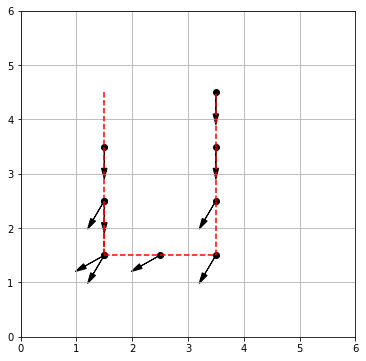

[(1, 4, 6),
 (1, 3, 6),
 (1, 2, 6),
 (1, 1, 7),
 (1, 2, 7),
 (1, 1, 8),
 (2, 1, 8),
 (3, 1, 7),
 (3, 2, 7),
 (3, 3, 6),
 (3, 4, 6)]

In [29]:
pi_opt, v_opt = value_iteration2(0.25, 0.9, S,A)

get_traj(pi_opt, (1,4,6), 0 , S)

In [30]:
print(v_opt)

{(0, 0, 0): 0.0, (0, 0, 1): 0.0, (0, 0, 2): 0.0, (0, 0, 3): 0.0, (0, 0, 4): 0.0, (0, 0, 5): 0.0, (0, 0, 6): 0.0, (0, 0, 7): 0.0, (0, 0, 8): 0.0, (0, 0, 9): 0.0, (0, 0, 10): 0.0, (0, 0, 11): 0.0, (0, 1, 0): 0.0, (0, 1, 1): 0.0, (0, 1, 2): 0.0, (0, 1, 3): 0.0, (0, 1, 4): 0.0, (0, 1, 5): 0.0, (0, 1, 6): 0.0, (0, 1, 7): 0.0, (0, 1, 8): 0.0, (0, 1, 9): 0.0, (0, 1, 10): 0.0, (0, 1, 11): 0.0, (0, 2, 0): 0.0, (0, 2, 1): 0.0, (0, 2, 2): 0.0, (0, 2, 3): 0.0, (0, 2, 4): 0.0, (0, 2, 5): 0.0, (0, 2, 6): 0.0, (0, 2, 7): 0.0, (0, 2, 8): 0.0, (0, 2, 9): 0.0, (0, 2, 10): 0.0, (0, 2, 11): 0.0, (0, 3, 0): 0.0, (0, 3, 1): 0.0, (0, 3, 2): 0.0, (0, 3, 3): 0.0, (0, 3, 4): 0.0, (0, 3, 5): 0.0, (0, 3, 6): 0.0, (0, 3, 7): 0.0, (0, 3, 8): 0.0, (0, 3, 9): 0.0, (0, 3, 10): 0.0, (0, 3, 11): 0.0, (0, 4, 0): 0.0, (0, 4, 1): 0.0, (0, 4, 2): 0.0, (0, 4, 3): 0.0, (0, 4, 4): 0.0, (0, 4, 5): 0.0, (0, 4, 6): 0.0, (0, 4, 7): 0.0, (0, 4, 8): 0.0, (0, 4, 9): 0.0, (0, 4, 10): 0.0, (0, 4, 11): 0.0, (0, 5, 0): 0.0, (0, 5, 1): 0.

### 5(c):
- Given the original reward, the algorithm seems to be immune to high error probability pe and the result is not terrible at all.
- With the modified reward and high error probability, however, the algorithm seem to make the robot move back and forth but the goal was still achived.
- The value iteration took less time to converge than the policy iteration since the algorithm itself is less complicated.